



# linear regression for wind speed prediction

In [2]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


In [3]:
dataset = pd.read_csv('cbe1.csv')

In [4]:
dataset.head()

,DateTime,AirTemperature,WindSpeed,WindDirection
0,15-02-2016 01:00,25.4,1.6,255.0
1,15-02-2016 02:00,24.8,1.4,273.0
2,15-02-2016 03:00,24.1,0.7,347.0
3,15-02-2016 04:00,23.1,1.6,286.0
4,15-02-2016 05:00,22.5,1.6,275.0


In [5]:
dataset.shape


(30600, 4)

In [6]:
dataset.size

122400

In [7]:
dataset.shape

(30600, 4)

In [8]:
dataset.describe()

,AirTemperature,WindSpeed,WindDirection
count,30600.000000,30600.000000,30600.000000
mean,26.641052,3.281431,170.499183
std,4.845548,2.118314,95.180175
min,-33.100000,0.000000,0.000000
25%,24.200000,1.800000,108.000000
50%,26.200000,2.800000,166.000000
75%,29.325000,4.100000,220.000000
max,40.600000,16.000000,359.000000


<function matplotlib.pyplot.show(*args, **kw)>

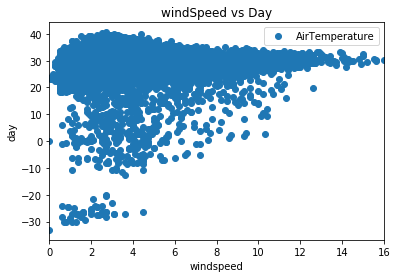

In [9]:
dataset.plot(x='WindSpeed', y='AirTemperature', style='o')  
plt.title('windSpeed vs Day')  
plt.xlabel('windspeed')  
plt.ylabel('day')  
plt.show

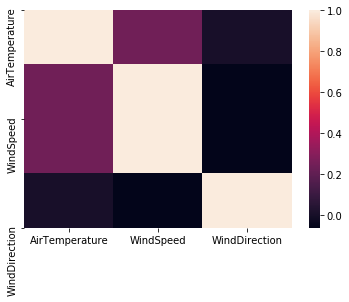

In [10]:
sns.heatmap(dataset.corr())

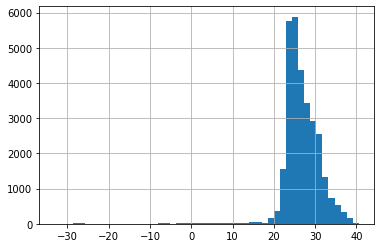

In [11]:

dataset['AirTemperature'].hist(bins=50)

In [12]:
dataset.head()

,DateTime,AirTemperature,WindSpeed,WindDirection
0,15-02-2016 01:00,25.4,1.6,255.0
1,15-02-2016 02:00,24.8,1.4,273.0
2,15-02-2016 03:00,24.1,0.7,347.0
3,15-02-2016 04:00,23.1,1.6,286.0
4,15-02-2016 05:00,22.5,1.6,275.0


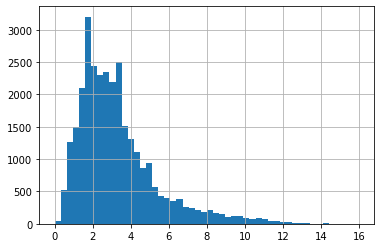

In [13]:
dataset['WindSpeed'].hist(bins=50)

In [14]:
dataset.tail()

,DateTime,AirTemperature,WindSpeed,WindDirection
30595,04-01-2020 07:00,23.9,1.2,230.0
30596,04-01-2020 08:00,24.1,2.1,341.0
30597,04-01-2020 09:00,24.9,3.4,0.1
30598,04-01-2020 10:00,26.5,3.4,345.0
30599,04-01-2020 11:00,27.5,3.3,333.0


In [15]:
X = dataset[['AirTemperature']].values
y = dataset[['WindSpeed']].values

In [16]:
X

array([[25.4],
       [24.8],
       [24.1],
       ...,
       [24.9],
       [26.5],
       [27.5]])

In [17]:
X.size

30600

X = dataset[['19.8']].values
y = dataset[['1']].values

In [18]:
X.shape

(30600, 1)

In [19]:
y

array([[1.6],
       [1.4],
       [0.7],
       ...,
       [3.4],
       [3.4],
       [3.3]])

In [20]:
y.shape

(30600, 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
y.size

30600

In [23]:
X_train

array([[27.3],
       [29.9],
       [25.3],
       ...,
       [23.7],
       [31.1],
       [30.9]])

In [24]:
X_test

array([[30.1],
       [25.2],
       [26.8],
       ...,
       [25.1],
       [23.3],
       [25.2]])

In [25]:
y_test

array([[5.1],
       [2.7],
       [9.9],
       ...,
       [1.9],
       [1.7],
       [1.2]])

In [26]:
y_train

array([[4.1],
       [3.1],
       [5.8],
       ...,
       [1. ],
       [9.1],
       [5.2]])

In [27]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:

print(regressor.intercept_)
print(regressor.coef_)


[0.50881037]
[[0.10403297]]


In [29]:
y_pred = regressor.predict(X_test)


In [32]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,5.1,3.640203
1,2.7,3.130441
2,9.9,3.296894
3,7.0,3.026408
4,3.4,3.400927
...,...,...
7645,3.2,2.859955
7646,2.7,3.556976
7647,1.9,3.120038
7648,1.7,2.932779


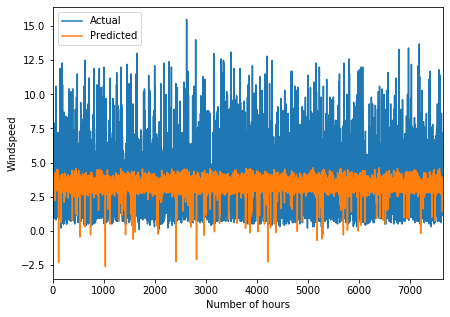

In [33]:
df1 = df.head(7650)
df1.plot(kind='line',figsize=(7,5))
plt.xlabel("Number of hours")
plt.ylabel("Windspeed")
plt.show()

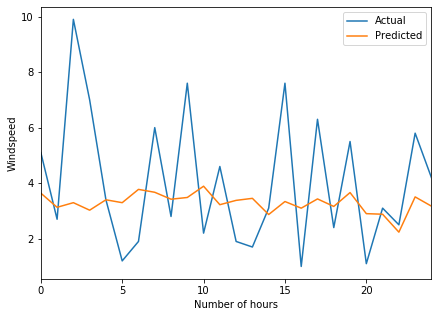

In [30]:
df1 = df.head()
df1.plot(kind='line',figsize=(7,5))
plt.xlabel("Number of hours")
plt.ylabel("Windspeed")
plt.show()

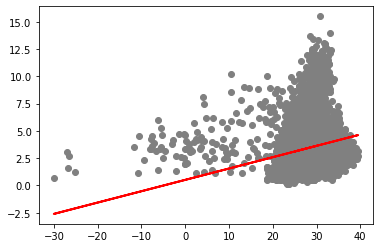

In [31]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [32]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 


Mean Squared Error: 4.181498147472353
Root Mean Squared Error: 2.0448711811437787
Mean Absolute Error: 1.5076175592458474
